**Business Analytics and Data Visualization**

Prof Jose Mendoza

Chapter 8 - Exercise 1

File: armands_r.csv



> Note: This notebook assumes that the file breakfast.csv is located in Google Drive, in a folder named 'Data'. *



In [1]:
import pandas as pd

# To ignore warinings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read data file from the Data folder

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/Data/armands_r.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Restaurant,Population,Sales
0,1,2,58
1,2,6,105
2,3,8,88
3,4,8,118
4,5,12,117


In [4]:
# Display a summary of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Restaurant  10 non-null     int64
 1   Population  10 non-null     int64
 2   Sales       10 non-null     int64
dtypes: int64(3)
memory usage: 368.0 bytes


In [5]:
# Perform a linear regression with Population and Sales

import statsmodels.formula.api as sm

# Perform linear regression
result = sm.ols('Sales ~ Population', data=df).fit()

# Print the regression summary
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           2.55e-05
Time:                        15:27:58   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     60.0000      9.226      6.503      0.0

In [6]:
# Create a vector of predicted values

# Get the predicted values
predicted_values = result.predict()

# Print the predicted values
print(predicted_values)


[ 70.  90. 100. 100. 120. 140. 160. 160. 170. 190.]


In [7]:
# Create a vector of residual values

# Get the residuals
residuals = result.resid

# Print the residuals
print(residuals)


0   -12.0
1    15.0
2   -12.0
3    18.0
4    -3.0
5    -3.0
6    -3.0
7     9.0
8   -21.0
9    12.0
dtype: float64


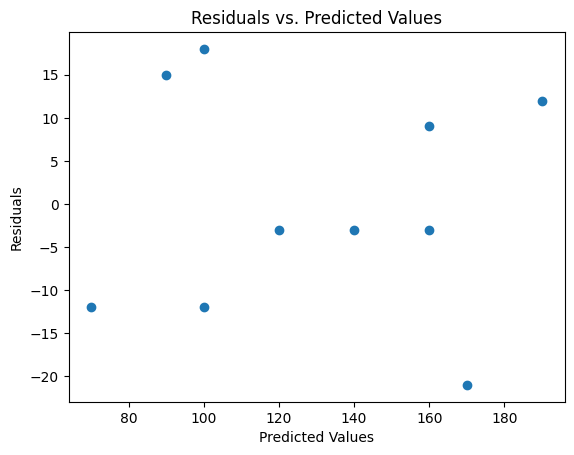

In [8]:
# Plot residuals against predicted values

import matplotlib.pyplot as plt

# Plot residuals against predicted values
plt.scatter(predicted_values, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


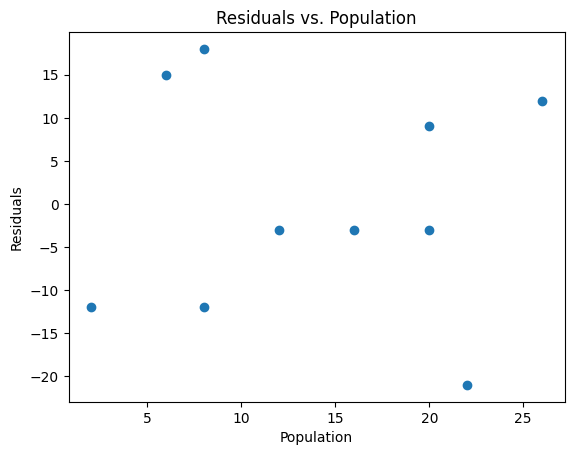

In [9]:
# Plot residuals vs. population

# Plot residuals against Population
plt.scatter(df['Population'], residuals)
plt.xlabel('Population')
plt.ylabel('Residuals')
plt.title('Residuals vs. Population')
plt.show()


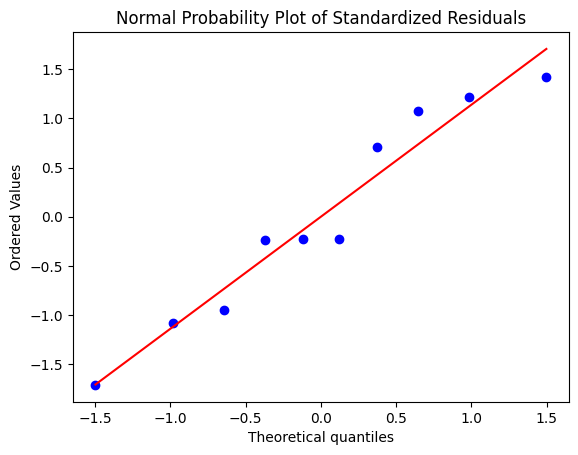

In [10]:
# Produce a normal probability plot of standardized residuals

import scipy.stats as stats

# Calculate standardized residuals
standardized_residuals = result.get_influence().resid_studentized_internal

# Create a normal probability plot
stats.probplot(standardized_residuals, plot=plt)
plt.title('Normal Probability Plot of Standardized Residuals')
plt.show()


In [11]:
# Create a list of standardize residuals

# Calculate standardized residuals
standardized_residuals = result.get_influence().resid_studentized_internal

#create a list of standardize residuals
standardized_residuals_list = standardized_residuals.tolist()
print(standardized_residuals_list)


[-1.0792035263032795, 1.2224013125635866, -0.9486728593660918, 1.4230092890491433, -0.22956468441605668, -0.22956468441605668, -0.23716821484152129, 0.7115046445245728, -1.7113618375890167, 1.0792035263032829]


In [12]:
# Calculate the hat values

# Calculate hat values
influence = result.get_influence()
hat_values = influence.hat_matrix_diag

# Print hat values
print(hat_values)


[0.35352113 0.21267606 0.16338028 0.16338028 0.10704225 0.10704225
 0.16338028 0.16338028 0.21267606 0.35352113]


In [13]:
# Calculate the Cook's D Statistics

# Calculate Cook's D statistics
cooks_d = influence.cooks_distance[0]

# Print Cook's D statistics
print(cooks_d)


[0.31844743 0.20181933 0.08787685 0.19772292 0.00315867 0.00315867
 0.0054923  0.04943073 0.39556589 0.31844743]


In [16]:
# Create a new data frame to predict the Population of 14

# Create a new DataFrame for prediction
new_data = pd.DataFrame({'Population': [14]})

# Predict sales for the new data
predicted_sales = result.predict(new_data)

# Calculate the 95% confidence interval for the prediction
prediction_interval = result.get_prediction(new_data).summary_frame(alpha=0.05)

# Print the predicted sales
print(predicted_sales, prediction_interval)


0    130.0
dtype: float64     mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  obs_ci_upper
0  130.0  4.373214     119.915351     140.084649     96.553002    163.446998
